In [10]:
%matplotlib inline
import numpy as np
import pandas as pd
import skimage
from skimage import io, color
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
from numpy import loadtxt
from keras.models import load_model

In [26]:
img = os.listdir('DLFiles/images_upload/')
img = img[len(img) - 1]
pathname = 'DLFiles/images_upload/{}'.format(img)

In [28]:
#Load les fichiers pour etre train par le model
gray_scale = np.load('C:/Users/arnaud/Desktop/dev_c_ia/DLColorization/IcoNaudon/projetDL/test/gray/gray_scale.npy')[:299]
ab_scale = np.load('C:/Users/arnaud/Desktop/dev_c_ia/DLColorization/IcoNaudon/projetDL/test/ab/ab1.npy')[:300]
print(gray_scale.shape)
print(ab_scale.shape)



MemoryError: 

In [15]:
def imgtoSizeNeeded(imgpath, size): 
    img = Image.open(imgpath).convert('LA') 
    data = np.asarray( img, dtype="uint8" ) 
    img = data[:, :, 0] 
    img = cv2.resize(img, size) 
    #display(img) 
    #print(img.shape) 
    img = np.expand_dims(img, axis=0) 
    return img
img = imgtoSizeNeeded(pathname, (224,224))
gray_scale = np.concatenate((gray_scale, img), axis=0)

In [17]:


def display(img):
    plt.figure()
    plt.set_cmap('gray')
    plt.imshow(img)
    plt.show()


def combineLAB(l, a, b):
    shape = (l.shape[0], l.shape[1], 3)
    zeros = np.zeros(shape)
    zeros[:, :, 0] = l
    zeros[:, :, 1] = a
    zeros[:, :, 2] = b
    return zeros


def combineAB(a, b):
    shape = (a.shape[0], b.shape[1], 2)
    zeros = np.zeros(shape)
    zeros[:, :, 0] = a
    zeros[:, :, 1] = b
    return zeros


def combineL_AB(l, ab):
    shape = (l.shape[0], l.shape[1], 3)
    zeros = np.zeros(shape)
    zeros[:, :, 0] = l
    zeros[:, :, 1] = ab[:, :, 0]
    zeros[:, :, 2] = ab[:, :, 1]
    return zeros


def make3channels(gray):
    shape = (gray.shape[0], gray.shape[1], 3)
    zeros = np.zeros(shape)
    zeros[:, :, 0] = gray
    zeros[:, :, 1] = gray
    zeros[:, :, 2] = gray
    return zeros


def get_l_from_gray(img_path):
    img = io.imread(img_path)
    img = skimage.transform.resize(img,(64,64))
    gray = color.rgb2gray(img)
    gray = make3channels(gray)
    lgray = color.rgb2lab(gray, illuminant='D50')[:, :, 0]
    return lgray


def get_ab_from_file(file):
    img = io.imread(file)
    ab = np.zeros((64, 64, 2))
    ab[:, :, 0] = img[:, :, 1]
    ab[:, :, 1] = img[:, :, 2]
    return ab


def lab_normal_image(path):
    l, ab = load_img_for_training(path)
    l, ab = (l-127.5)/127.5, (ab-127.5)/127.5
    return l, ab


def rgb_image(l, ab):
    shape = (l.shape[0],l.shape[1],3)
    img = np.zeros(shape)
    img[:,:,0] = l[:,:,0]
    img[:,:,1:]= ab
    img = img.astype('uint8')
    img = cv2.cvtColor(img, cv2.COLOR_LAB2RGB)
    return img


def load_img_for_training(img_path):
    img = io.imread(img_path)
    img = skimage.transform.resize(img,(64,64))
    lab = color.rgb2lab(img, illuminant='D50')
    l, a, b = lab[:, :, 0], lab[:, :, 1], lab[:, :, 2]
    ab = combineAB(a, b)
    lgray = get_l_from_gray(img_path)
    return lgray, ab


def save_ab_file(image, filepath):
    # add in 0zeros to its first component
    shape = (image.shape[0], image.shape[1], 3)
    new_ab_image = np.zeros(shape)
    new_ab_image[:, :, 1] = image[:, :, 0]
    new_ab_image[:, :, 2] = image[:, :, 1]
    save_file(new_ab_image, filepath)


def save_file(image, filepath):
    io.imsave(filepath, image)


def load_ab_image(path):
    img = io.imread(path)
    shape = (img.shape[0], img.shape[1], 2)
    ab = np.zeros(shape)
    ab[:, :, 0] = img[:, :, 1]
    ab[:, :, 1] = img[:, :, 2]
    return ab



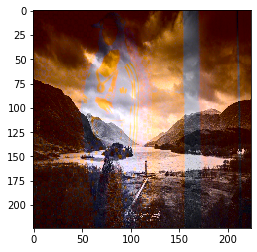

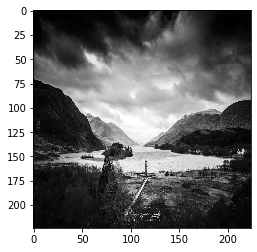

In [18]:
index = 299
l_sample,ab_sample = gray_scale[index].reshape((224,224,1)),ab_scale[index]
rgb_sample = rgb_image(l_sample,ab_sample)
display(rgb_sample)
display(l_sample[:,:,0])

In [19]:
def normalize(image):
    # convert image from range 0-256 to 
    #image = cv2.resize(image, dsize=(64, 64), interpolation=cv2.INTER_CUBIC)
    image = image/255
    return image

def unnormalize(image):
    image = (image*255)
    return image.astype('uint8')

In [21]:
gray_scale.shape

(6000, 224, 224)

In [9]:
import os

In [5]:
'''
C'est une CASE D'ESSAI:
Via une page web (projetDL.html) on récupère une image, par exemple dans le dossier images.
via la page action_upload.php on récupère l'image et on la stocke dans le dossier images_upload.
'''
#la variable est une list avec les noms de photos sotcké, on récupère la dernière photo
#img = os.listdir('DLFiles/images_upload/')
#img = img[len(img) - 1]
#print(img)

5hHyOa.jpg


In [25]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
#Load l'image noir et blanc en 224 par 224 que tu souhaites mettre en couleur
#img = mpimg.imread('C:/Users/Linami/test4.jpg')
#On récupère la dernière l'image du dossier images-upload
#img_name = os.listdir('DLFiles/images_upload/')
#taille = len(img_name)
#taille = taille - 1
#img_name = img_name[taille]
#img_name = "\"" + img_name + "\""
#img = mpimg.imread(os.listdir('DLFiles/images_upload/img_name'))
#img = mpimg.imread(img_name)

img = os.listdir('DLFiles/images_upload/')
img = img[len(img) - 1]
pathname = 'DLFiles/images_upload/{}'.format(img)
img = mpimg.imread(pathname)

gray = rgb2gray(img)    
xas = np.around(gray)
ma = xas.astype(int)

#ma.shape
Finally = np.expand_dims(ma, axis=0)
#Finally.shape
gray_scale = np.concatenate((gray_scale, Finally), axis=0)

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [24]:
x = np.zeros((3000,224,224,1))
y = np.zeros((3000,224,224,2))

for i in range(3000):
    l_sample = normalize(gray_scale[i])
    ab_sample = normalize(ab_scale[i])
    x[i] = l_sample.reshape((224,224,1))
    y[i] = ab_sample  

MemoryError: 

In [26]:


from keras import *
from keras.layers import *
from keras.activations import *
from keras.optimizers import *
from matplotlib import pyplot as plt
from utils import *
from keras.initializers import RandomNormal, Zeros



Using TensorFlow backend.


In [27]:
inputs = Input((224, 224, 1))
conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)


In [28]:
up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)
up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)
up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)
up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)
conv10 = Conv2D(2, (3, 3), activation='relu', padding='same')(conv9)

model = Model(inputs=[inputs], outputs=[conv10])
model.compile(optimizer='adam', loss='mse', metrics=['acc'])
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 224, 224, 32) 320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 224, 224, 32) 9248        conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 112, 112, 32) 0           conv2d_2[0][0]                   
___________________________________________________________________________________________

In [9]:
samples = x.shape[0]


In [10]:

from numpy import loadtxt
from keras.models import load_model

Using TensorFlow backend.


In [11]:
model = load_model('C:/Users/Linami/model.h5')
# summarize model.
model.summary()



Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 224, 224, 32) 320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 224, 224, 32) 9248        conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 112, 112, 32) 0           conv2d_2[0][0]                   
__________________________________________________________________________________________

In [12]:
def residual_block(feature, dropout=False):
    x = Conv2D(128, kernel_size=3, strides=1, padding='same', kernel_initializer=RandomNormal(
        mean=0.0, stddev=0.02), bias_initializer=Zeros())(feature)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    if dropout:
        x = Dropout(0.5)(x)
    x = Conv2D(128, kernel_size=3, strides=1, padding='same', kernel_initializer=RandomNormal(
        mean=0.0, stddev=0.02), bias_initializer=Zeros())(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    return Add()([feature, x])


def build_model(n_block=5):
    image_size = 224
    input_channel = 1
    output_channel = 2
    input = Input(shape=(image_size, image_size, input_channel))
    x = Conv2D(224, kernel_size=7, padding='same', kernel_initializer=RandomNormal(
        mean=0.0, stddev=0.02), bias_initializer=Zeros())(input)  # use reflection padding instead
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    # downsample
    x = Conv2D(200, kernel_size=3, strides=2, padding='same', kernel_initializer=RandomNormal(
        mean=0.0, stddev=0.02), bias_initializer=Zeros())(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    # downsample
    x = Conv2D(128, kernel_size=3, strides=2, padding='same', kernel_initializer=RandomNormal(
        mean=0.0, stddev=0.02), bias_initializer=Zeros())(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    for i in range(n_block):
        x = residual_block(x)
    # upsample
    x = Conv2DTranspose(200, kernel_size=3, strides=2, padding='same',
                        kernel_initializer=RandomNormal(mean=0.0, stddev=0.02), bias_initializer=Zeros())(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    # upsample
    x = Conv2DTranspose(224, kernel_size=3, strides=2, padding='same', kernel_initializer=RandomNormal(
        mean=0.0, stddev=0.02), bias_initializer=Zeros())(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    # out
    x = Conv2D(output_channel, kernel_size=7, padding='same', kernel_initializer=RandomNormal(
        mean=0.0, stddev=0.02), bias_initializer=Zeros())(x)  # use reflection padding instead
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    model = Model(inputs=input, outputs=x)
    model.summary()
    return model


    

def save_images(generator, samples):
    ab_values = generator.predict(samples)
    plt.figure()
    plt.set_cmap('gray')
    for i in range(ab_values.shape[0]):
        l_val = unnormalize(samples[i])
        ab_val = unnormalize(ab_values[i])
        rgb = rgb_image(l_val, ab_val)
        if i == 0:
            display(rgb)
        ax = plt.subplot(224, 224, i+1)
        im = ax.imshow(rgb)
        plt.tight_layout()
        plt.title(i)
    plt.show()
    plt.savefig('gan_generated_image.jpg')


    
def train_network(x_data,y_data,epochs=100, batch_size=128, save_interval=5):
    input_shape = (224, 224, 1)
    output_shape = (224, 224, 2)
    model = build_model(0)
    model.compile(optimizer='adam', loss='mse', metrics=['mse','acc'])
    history = model.fit(x_data,y_data,validation_split=0.1,epochs=epochs,batch_size=128,)
    model.save('model.h5')
    print("MODEL SAVED")
    return model,history
    

In [13]:
samples = x[5999:6000]

In [15]:
import matplotlib
a = model.predict(samples)
plt.figure()
plt.set_cmap('gray')
for i in range(a.shape[0]):
    l_val = unnormalize(samples[i])
    ab_val = unnormalize(a[i])
    rgb = rgb_image(l_val, ab_val)
    matplotlib.image.imsave("imag_"+str(i)+".png", rgb)

<Figure size 432x288 with 0 Axes>

In [ ]:
rgb.shape

In [ ]:
import matplotlib

matplotlib.image.imsave('name.png', rgb)


In [ ]:
model.predict(samples)

In [ ]:
def save_images(generator, samples):
    ab_values = generator.predict(samples)
    plt.figure()
    plt.set_cmap('gray')
    for i in range(ab_values.shape[0]):
        l_val = unnormalize(samples[i])
        ab_val = unnormalize(ab_values[i])
        rgb = rgb_image(l_val, ab_val)
        if i == 0:
            display(rgb)
        ax = plt.subplot(224, 224, i+1)
        im = ax.imshow(rgb)
        plt.tight_layout()
        plt.title(i)
    plt.show()
    plt.savefig('gan_generated_image.jpg')